## DEMO: Particle in a box

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from ipywidgets.widgets import interact, interactive

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

try:
    from google.colab import output
    output.enable_custom_widget_manager()
    print('All good to go')
except:
    print('Okay we are not in Colab just proceed as if nothing happened')

Okay we are not in Colab just proceed as if nothing happened


- Set atomic units: $h=1, m=1$

$$\psi_n(x)=\sqrt{\frac{2}{L}}sin \frac{n\pi x}{L}$$

$$E_n = \frac{n^2 h^2}{8m L^2}$$

In [4]:
h, m = 1, 1 
hbar = h/(2*np.pi)

def Epib1d(n=1, L=1):
        '''Calculates energy of 1D PIB state.
        Args:
        n (int): Quantum number specifying state.
        L (float): Box dimensions in Bohr.
        Returns:
         Float energy value in Ha.
        '''

        En = (n**2 * np.pi**2 * hbar**2) / (2 * m * L**2)

        return En

    
def psi(x, n=1, L=1):      
        '''Numeric representation of the normalized 1D PIB wavefunction.
        Args:
         x  (float or array): Cartesian spatial values.
         n  (int):   Quantum number
         L  (float): Box dimensions in Bohr.
        Returns:
        Wavefunction evaulated at a point or array if input x are arrays.
        '''

        fn = np.sqrt(2/L)*np.sin(n*np.pi*x/L)

        return fn

### Compute energies

In [5]:
Epib1d(n=3) #-energy(n=1)

1.1250000000000002

### Compare wave function and its square

<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:11: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:11: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_3246/1084375872.py:10: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(x, psi1d, lw=2, label=f'$\psi_{n}(x)$')
/tmp/ipykernel_3246/1084375872.py:11: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(x, psi1d**2, lw=2, label=f'$\psi_{n}(x)^2$')


Text(0.5, 1.0, 'n=4')

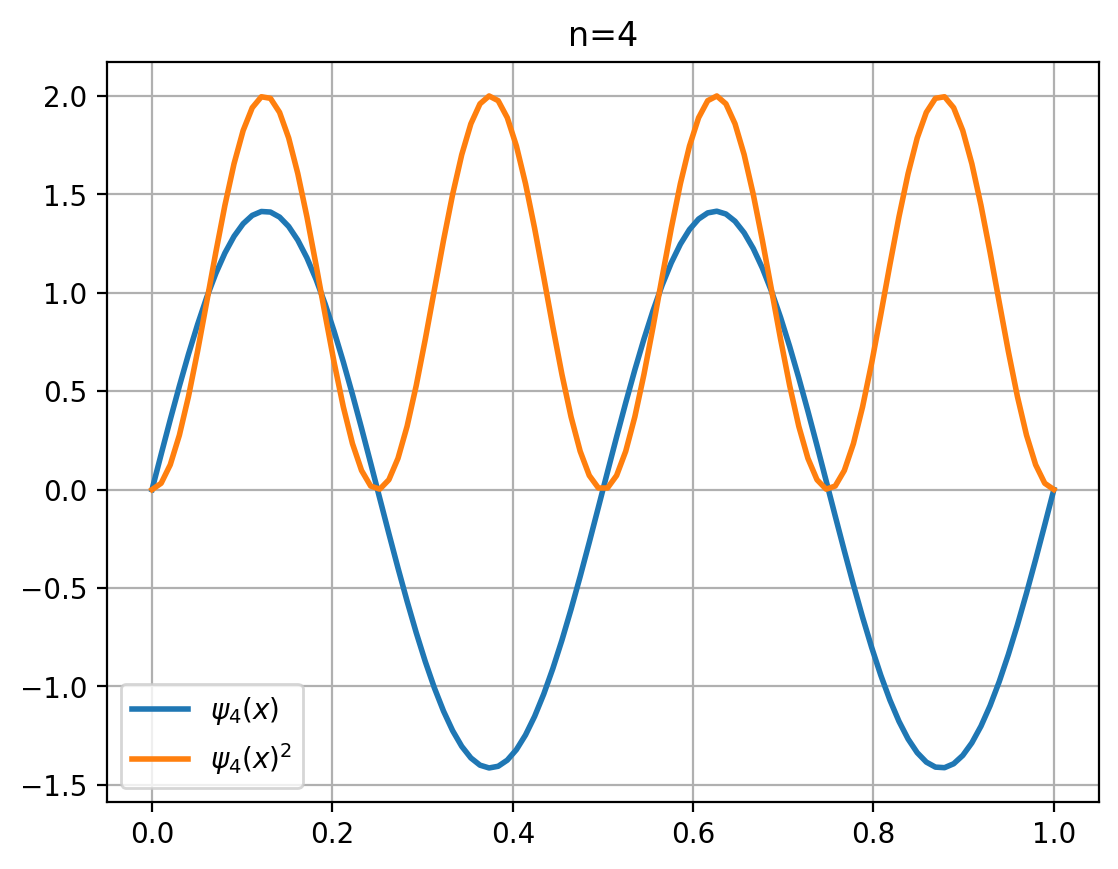

In [6]:
### Change these values
n=4
L=1

### Compute wavefunction and its square
x = np.linspace(0, L, 100)
psi1d = psi(x, n=n, L=L)

### Plot wave function and its square
plt.plot(x, psi1d, lw=2, label=f'$\psi_{n}(x)$')
plt.plot(x, psi1d**2, lw=2, label=f'$\psi_{n}(x)^2$')
plt.grid('--')
plt.legend()
plt.title(f'n={n}')

### Interactive exploration of 1D quantum particle in a box

In [7]:
def plot_energy_levels(L=1, max_n=1):
    
    fig, (ax, ax2) = plt.subplots(figsize=(8, 6), ncols=2)

    for n in range(1, max_n+1):
        
        En = Epib1d(n, L)
        
        ax.hlines(En, 0.5, 1.5, colors='blue', linewidth=2)
        ax.text(1.6, En, f"n={n}, E={En:.2f}", verticalalignment='center')
        
    ax.set_xlim(0, 3)
    ax.set_ylim(0, Epib1d(n=max_n+1, L=L ))
    ax.set_xlabel("Particle in a Box")
    ax.set_ylabel("Energy")
    ax.set_title("Energy Levels of a 1D Quantum Particle in a Box")
    ax.axes.get_xaxis().set_visible(False)
    
    x = np.linspace(0, L, 1000)
    psi1d = psi(x, n=max_n, L=L)
   
    ax2.fill(x, psi1d**2, color="green", lw=3)
    ax2.set_xlim([-0.1, L+0.1])
    ax2.set_ylim([0, 4])
    
    # Put two red lines to indicate boundaries
    ax2.axvline(0,0,10*L, color='red',lw=3)
    ax2.axvline(L,0,10*L, color='red',lw=3)
    
    # Label axis
    ax2.set_xlabel('x',fontsize=20)
    ax2.set_ylabel('$\psi_n^2(x)$',fontsize=20)
    
    #Put tiltle
    ax2.set_title('n='+str(n))
    
    plt.tight_layout()
    plt.show()

<>:32: SyntaxWarning: invalid escape sequence '\p'
<>:32: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_3246/3594067934.py:32: SyntaxWarning: invalid escape sequence '\p'
  ax2.set_ylabel('$\psi_n^2(x)$',fontsize=20)


In [8]:
interact(plot_energy_levels, L=(0.5,2), max_n=(1,10))

: 

### Particle in 3D Box

In [ ]:
def psi_reg(x, y, z, nx=1, ny=1, nz=1, lx=1, ly=1, lz=1):
        '''Numeric representation of the normalized 3D PIB wavefunction.
        Args:
         x, y, z (float or array): Cartesian spatial values.
         q_nx, q_ny, q_nz (int): Quantum numbers specifying state.
         lx, ly, lz (int): Box dimensions in Bohr.
        Returns:
         Wavefunction evaulated at a point or array if input x, y, z are arrays.
        '''

        return psi(x, nx, lx) * psi(y, ny, ly) * psi(z, nz, lz)


def psi_ener(nx, ny, nz, lx, ly, lz):
        '''Calculates energy of 3D PIB state.
        Args:
         qnx, qny, qnz (int): Quantum numbers specifying state.
         lx, ly, lz (float): Box dimensions in Bohr.
        Returns:
         Float energy value in Ha.
        '''

        return Epib1d(nx, lx) + Epib1d(ny, ly) + Epib1d(nz, lz)

In [ ]:
def pib3d_plotly(nx=1, ny=1, nz=1, lx=10, ly=10, lz=10):
  '''Displays and saves isosurface of 3D PIB wavefunction.
  Args:
      nx_val, ny_val, nz_val (int): Quantum numbers specifying state.
      lx, ly, lz (int): Box dimensions in Bohr.
      psi_square (bool): Calculate prob. density (true) or wavefunction (false).
      plot_save (bool): Save a .png file of display.
  '''
  # construct 3d grid of points
  nx_p, ny_p, nz_p = 7 * lx, 7 * ly, 7 * lz
  xp, yp, zp       = np.linspace(0, lx, nx_p), np.linspace(0, ly, ny_p), np.linspace(0, lz, nz_p)
  X, Y, Z          = np.meshgrid(xp, yp, zp, indexing='ij')
  psi              = psi_reg(X, Y, Z, nx, ny, nz, lx, ly, lz)
  psi2             = psi**2
  mean_dens        = psi2.mean()

  figure = go.Figure(data=go.Isosurface(
  x=X.flatten(),
  y=Y.flatten(),
  z=Z.flatten(),
  value=psi2.flatten(), # pis or psi2
  colorscale='BlueRed',
  isomin= -mean_dens,
  isomax=  mean_dens,
  surface_count=2,
  showscale=False,
  caps=dict(x_show=False, y_show=False, z_show=False)
  ))

  figure.update_layout(scene = dict(
                  xaxis_title='x',
                  yaxis_title='y',
                  zaxis_title='z',
                  aspectmode='data'),
                  width=800,
                  height=500,
                  title_text=f'Prob. Den., isovalue = {mean_dens:.4f}')

  figure.show()

In [ ]:
interact(pib3d_plotly, nx=(1,10), ny=(1,10), nz=(1,10), lx=(1,10), ly=(1,10), lz=(1,10))

### Visualize energy levels of 3D PIB

In [ ]:
def plot_energy_levels(nx_max=10, ny_max=10, nz_max=10, lx=1, ly=1, lz=1):

    fig, ax = plt.subplots(figsize=(8, 6))

    for nx in range(1, nx_max+1):

        Enx = Epib1d(nx, lx)
        ax.hlines(Enx, 0.6, 1, colors='blue', linewidth=2)

    for ny in range(1, ny_max+1):

        Eny = Epib1d(ny, ly)
        ax.hlines(Eny, 1.1, 1.5, colors='green', linewidth=2)

    for nz in range(1, nz_max+1):

        Enz = Epib1d(nz, lz)
        ax.hlines(Enz, 1.6, 2.0, colors='yellow', linewidth=2)


    E_max =     Epib1d(nx_max+1, lx)+Epib1d(ny_max+1, ly)+Epib1d(nz_max+1, lz)
    ax.set_xlim(0.5, 2.1)
    ax.set_ylim(0, E_max)
    ax.set_xlabel("Particle in a 3d Box")
    ax.set_ylabel("Energy")
    ax.set_title(f"Energy Levels of a 3D Quantum Particle in a Box E={E_max:2f}")
    ax.axes.get_xaxis().set_visible(False)

    plt.tight_layout()
    plt.show()

In [ ]:
interact(plot_energy_levels, nx=(1,10), ny=(1,10), nz=(1,10), lx=(1,10), ly=(1,10), lz=(1,10))

### Symbolic evaluations of Paritcle in a box integrals

In [ ]:
from sympy import symbols, sqrt, sin, pi, diff, integrate, simplify, pprint, init_printing

# Initialize pretty printing
init_printing()

# Define symbols
x, L, n, hbar = symbols('x L n hbar', real=True, positive=True)

#### Step 1: Define the wavefunction

In [ ]:
psi_n = sqrt(2/L) * sin(n * pi * x / L)

print("Wavefunction ψ_n(x):")

pprint(psi_n)


#### Step 2: Compute the second derivative of ψ_n(x)

In [ ]:
d2psi_dx2 = diff(psi_n, x, x)

print("Second derivative d²ψ_n/dx²:")

pprint(d2psi_dx2)


#### Step 3: Apply the momentum squared operator: -ħ² d²ψ_n/dx²

In [ ]:
op_psi = -hbar**2 * d2psi_dx2

print("Momentum operator applied to ψ_n(x): -ħ² d²ψ_n/dx²:")

pprint(op_psi)



#### Step 4: Compute the integrand ψ_n(x) * op_ψ_n(x)

In [ ]:

integrand = psi_n * op_psi

print("Integrand ψ_n(x) * (-ħ² d²ψ_n/dx²):")

pprint(integrand)



#### Step 5: Compute the expectation value ⟨p²⟩

In [ ]:
expectation = integrate(integrand, (x, 0, L))

print("Expectation value ⟨p²⟩ before simplification:")

pprint(expectation)

#### Step 6: Simplify the result

In [ ]:
expectation_simplified = simplify(expectation)

print("Simplified expectation value ⟨p²⟩:")

pprint(expectation_simplified)